## **California Houses**

### **1. First Step - Familiarise with the data.**

In [101]:
import os

import numpy as np
import pandas as pd

data_path = os.path.join("data", "housing.csv")
housing = pd.read_csv(data_path, engine="c")

In [102]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [103]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


It is easy to see that almost all columns are numeric. Only one has `object` type. We load the data from `.csv`, so this column must be `str` type. Moreover, we see "total_bedrooms" has several null values.

In [104]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [105]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [106]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

DARK_BLUE = "#141b4d"
LIGHT_GRAY = "#8f8f99"

mpl.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "xtick.color": DARK_BLUE,
    "ytick.color": DARK_BLUE,
    "xtick.major.pad": 10,
    "ytick.major.pad": 10,
    "xtick.bottom": True,
    "xtick.labelbottom": True,
    "ytick.left": True,
    "ytick.labelleft": True,
    "grid.color": LIGHT_GRAY,
    "grid.linestyle": "dashed",
    "grid.linewidth": 0.5,
    "grid.alpha": 0.25,
    "axes.labelpad": 10,
    "axes.labelcolor": DARK_BLUE,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "text.color": DARK_BLUE,
    "savefig.dpi": 300,
})

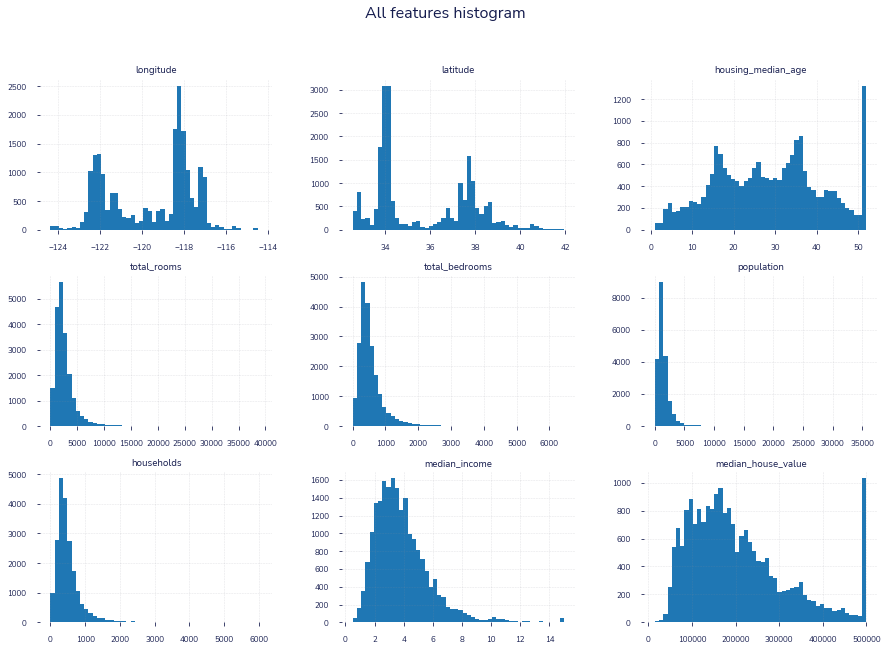

In [107]:
housing.hist(bins=50, figsize=(15,10))
plt.suptitle("All features histogram", fontsize=16)
plt.show()

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_4304\605208008.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([f"${v/1000:.0f}k" for v in tick_values], fontsize=16)


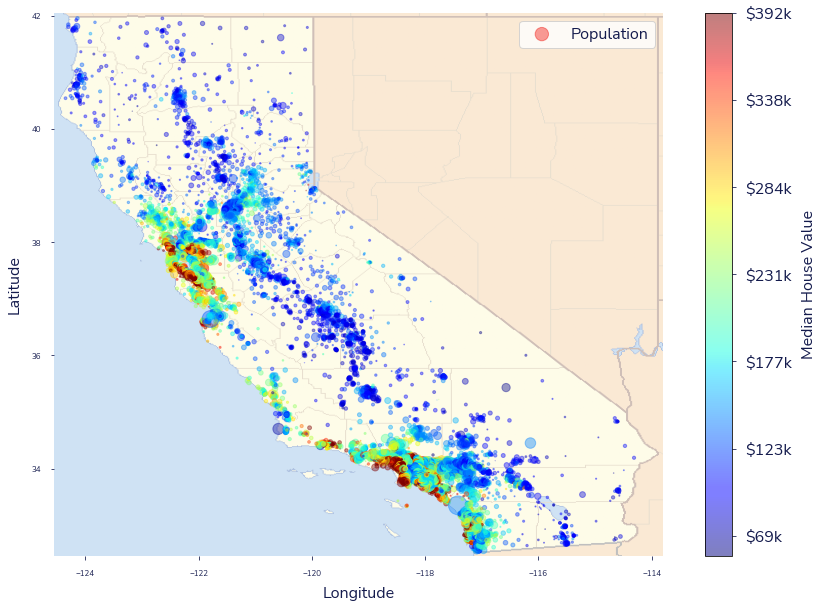

In [122]:
# Create houses map.
import matplotlib.image as mpimg

california_path = os.path.join("img", "california.png")
california_img = mpimg.imread(california_path)
ax = housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    s=housing["population"] / 100,
    label="Population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=False,
    alpha=0.4,
    figsize=(15,10)
)
plt.imshow(
    california_img,
    extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.5,
    cmap=plt.get_cmap("jet")
)
plt.ylabel("Latitude", fontsize=16)
plt.xlabel("Longitude", fontsize=16)
plt.legend(fontsize=16)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 10)
cbar = plt.colorbar()
cbar.ax.set_yticklabels([f"${v/1000:.0f}k" for v in tick_values], fontsize=16)
cbar.set_label("Median House Value", fontsize=16)

In [109]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

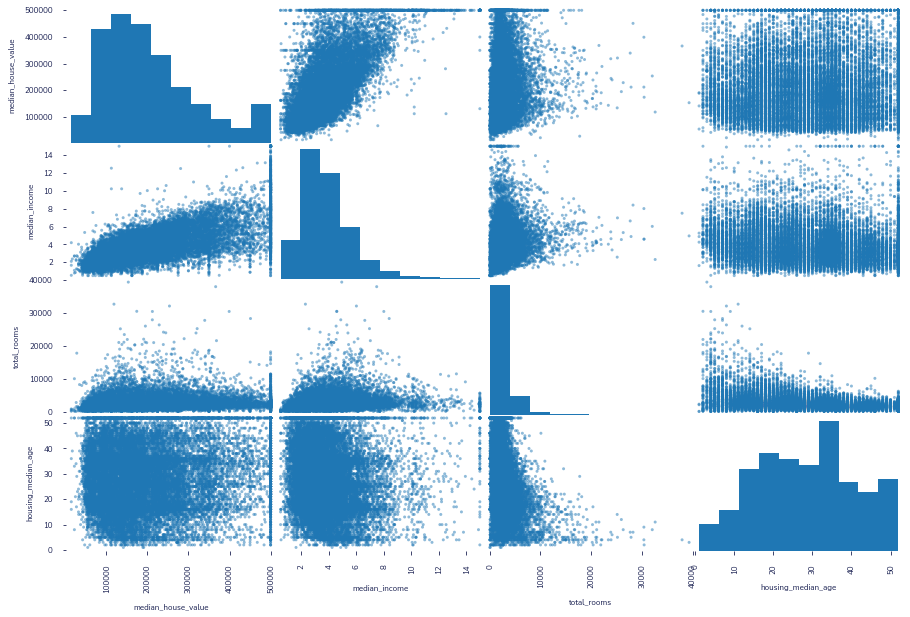

In [121]:
from pandas.plotting import scatter_matrix

attribs = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attribs], figsize=(15,10));

It is easy to see that median income has strong correlation with house price.

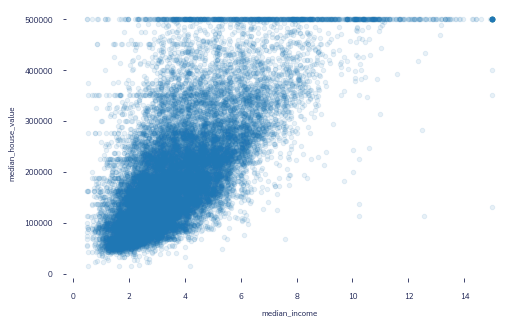

In [123]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(8, 5));

In [112]:
housing["rooms_per_households"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_households"]=housing["population"] / housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
rooms_per_households         0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
population_per_households   -0.023737
population                  -0.024650
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

The bedrooms per rooms has an interesting correlation. We see that if the number of bedrooms per room falls, house prices increase. But we see the most important here is the median income.

<AxesSubplot:>

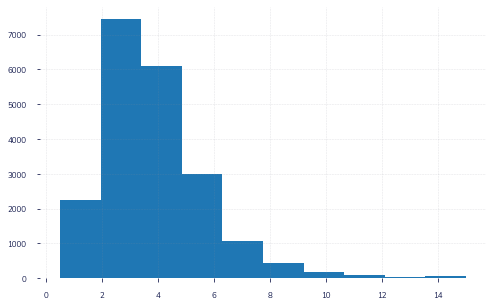

In [113]:
housing["median_income"].hist(figsize=(8, 5))

We know that median income has a relevant influence on the house price prediction. Therefore, we want to split the test set  related to that evenly.

In [114]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

In [115]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

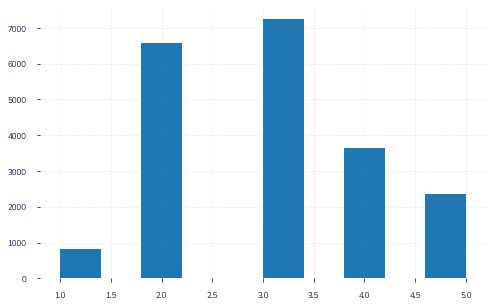

In [124]:
housing["income_cat"].hist(figsize=(8,5));

In [117]:
# Provide stratified sampling related to income category.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# If we didn't know about income importance, then we can make normal split.
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [118]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) # type: ignore

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [119]:
housing["income_cat"].value_counts() / len(housing) # type: ignore

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [120]:
# Having appropriately split train and test sets, we can remove created column.
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

In [125]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,bedrooms_per_rooms,population_per_households
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### **2. Second Step - Prepare the data for ML algorithms.**

In [129]:
# Remove lables from train set.
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [127]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_per_rooms,population_per_households,income_cat
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679,3
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255,2
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727,2
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137,4
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727,3


We see that some rows have NaN values, which have to be filled or removed.

In [128]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create own transformator class to add additional features to train set.
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # No *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # Nothing else to do
    def transform(self, X):
        rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [131]:
# Create a pipline to preprocess data.
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # Fit missing values with median.
        ('attribs_adder', CombinedAttributesAdder()), # Add additional attributes.
        ('std_scaler', StandardScaler()), # Provide standarization of the train set.
    ])

housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = housing[["ocean_proximity"]]
# Only numeric value can be transformed with num_pipeline.
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [133]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Create ColumnTransformer that transform both numeric and string columns
# and concatenate them together.
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

### **3. Choose and fit model.**

In [165]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())


In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71198.56289578 63821.26974903 67697.51839451 68290.0889512
 66753.95951496 72268.49850759 69881.93164451 68453.81835862
 65940.16635394 70071.80569063]
Mean: 68437.76200607639
Std: 2408.474408758666


In [168]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [72507.06929076 70938.34389572 68969.61701121 72008.3147559
 69576.77700412 76911.00011308 70706.14671618 74136.58143839
 67591.18850635 72407.05029764]
Mean: 71575.20890293615
Std: 2541.5610453927866


In [169]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51443.18973844 48613.62956597 46979.60405849 52152.60920956
 47510.67438746 51732.97817916 52440.81816611 50056.84192287
 48729.15639315 54192.99886588]
Mean: 50385.25004870922
Std: 2250.204975441205


### **4. Adjust the best model.**

In [170]:
# Looking for best parameters.
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Check 12 (3×4) hyperparameter combinations.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Next, check 6 (2×3) combinations.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# Learning process for (12+6)*5 = 90 runs.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [171]:
# Best found parameters:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [172]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [173]:
# Score for each combination:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65398.02611664638 {'max_features': 2, 'n_estimators': 3}
56444.908411019176 {'max_features': 2, 'n_estimators': 10}
54039.64386051053 {'max_features': 2, 'n_estimators': 30}
62001.40913707432 {'max_features': 4, 'n_estimators': 3}
54246.66797502356 {'max_features': 4, 'n_estimators': 10}
52178.306633058026 {'max_features': 4, 'n_estimators': 30}
60955.876462925524 {'max_features': 6, 'n_estimators': 3}
53609.18401647923 {'max_features': 6, 'n_estimators': 10}
51264.32869173396 {'max_features': 6, 'n_estimators': 30}
59711.63642844107 {'max_features': 8, 'n_estimators': 3}
52816.65324006809 {'max_features': 8, 'n_estimators': 10}
50981.64786281073 {'max_features': 8, 'n_estimators': 30}
65328.81211789274 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56504.10125334191 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62544.12605167445 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53943.5343513676 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [174]:
# Random searching.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E84EB17B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026F048564D0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [175]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50067.61184695183 {'max_features': 7, 'n_estimators': 180}
52582.87994296222 {'max_features': 5, 'n_estimators': 15}
51945.43652974617 {'max_features': 3, 'n_estimators': 72}
51997.433248670066 {'max_features': 5, 'n_estimators': 21}
50159.338226129614 {'max_features': 7, 'n_estimators': 122}
51908.29197167088 {'max_features': 3, 'n_estimators': 75}
51859.09158916055 {'max_features': 3, 'n_estimators': 88}
50722.45324577707 {'max_features': 5, 'n_estimators': 100}
51614.83486234876 {'max_features': 3, 'n_estimators': 150}
65635.65985069943 {'max_features': 5, 'n_estimators': 2}


In [176]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48689.22278115499

In [177]:
# 95% confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46644.45792103, 50651.50911197])